In [494]:
!pip install binance-connector
!pip install plotly
!pip install --upgrade nbformat
!pip install python-binance

In [495]:
from binance.spot import Spot as Client
import pandas as pd

spot_client = Client(base_url='https://testnet.binance.vision')

In [496]:
info = spot_client.exchange_info(symbol="BNBUSDT")
info

{'timezone': 'UTC',
 'serverTime': 1674867167662,
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 50},
  {'rateLimitType': 'ORDERS',
   'interval': 'DAY',
   'intervalNum': 1,
   'limit': 160000}],
 'exchangeFilters': [],
 'symbols': [{'symbol': 'BNBUSDT',
   'status': 'TRADING',
   'baseAsset': 'BNB',
   'baseAssetPrecision': 8,
   'quoteAsset': 'USDT',
   'quotePrecision': 8,
   'quoteAssetPrecision': 8,
   'baseCommissionPrecision': 8,
   'quoteCommissionPrecision': 8,
   'orderTypes': ['LIMIT',
    'LIMIT_MAKER',
    'MARKET',
    'STOP_LOSS_LIMIT',
    'TAKE_PROFIT_LIMIT'],
   'icebergAllowed': True,
   'ocoAllowed': True,
   'quoteOrderQtyMarketAllowed': True,
   'allowTrailingStop': True,
   'cancelReplaceAllowed': True,
   'isSpotTradingAllowed': True,
   'isMarginTradingAllowed': False,
   'filters': [{'filterType': 'PRIC

* Get account balance
* Get trade history
* Get deposit and withdrawal history

In 2017, Binance held a competition for contestants to create lightweight clients in multiple languages. python-binance won the best python implementation. 

In [498]:
# write a script to use the binance.spot.Spot class to get a testnet account balance for ETHUSDT given the following parameters:
    # base_url = 'https://testnet.binance.vision'


# define api_key and secret_key
api_key = '681cMi8ufsZsHRiYSxzV7a1ROXC8BLdVNaoSiTx7FjwhtkXNubS3xnP8l4ig5xTL'
api_secret = 'zLYyjNZkPCD0KAaKuyJZ3TPqoTMRfvGv33TwpXfoh4elFW5o3tm0YN290NLxwjZB'


from binance.client import Client
client = Client(api_key, api_secret, testnet=True)




In [499]:
tickers = client.get_all_tickers()
tickers = pd.DataFrame(tickers)
tickers

,symbol,price
0,BNBBUSD,309.20000000
1,BTCBUSD,23154.13000000
2,ETHBUSD,1603.18000000
3,LTCBUSD,88.93000000
4,TRXBUSD,0.06380000
5,XRPBUSD,0.41420000
6,BNBUSDT,309.20000000
7,BTCUSDT,23149.61000000
8,ETHUSDT,1603.20000000
9,LTCUSDT,88.91000000


In [500]:
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os


url = 'https://api1.binance.com'

api_call = '/api/v3/ticker/price'

headers = {'content-type': 'application/json', 
           'X-MBX-APIKEY': api_key}

response = requests.get(url + api_call, headers=headers)

response = json.loads(response.text)
df = pd.DataFrame.from_records(response)
df

,symbol,price
0,ETHBTC,0.06924300
1,LTCBTC,0.00384100
2,BNBBTC,0.01335300
3,NEOBTC,0.00036200
4,QTUMETH,0.00171000
...,...,...
2139,RPLBTC,0.00170500
2140,RPLBUSD,39.46000000
2141,RPLUSDT,39.49000000
2142,PROSUSDT,0.69630000


Text(0.5, 1.0, 'Order Book Depth')

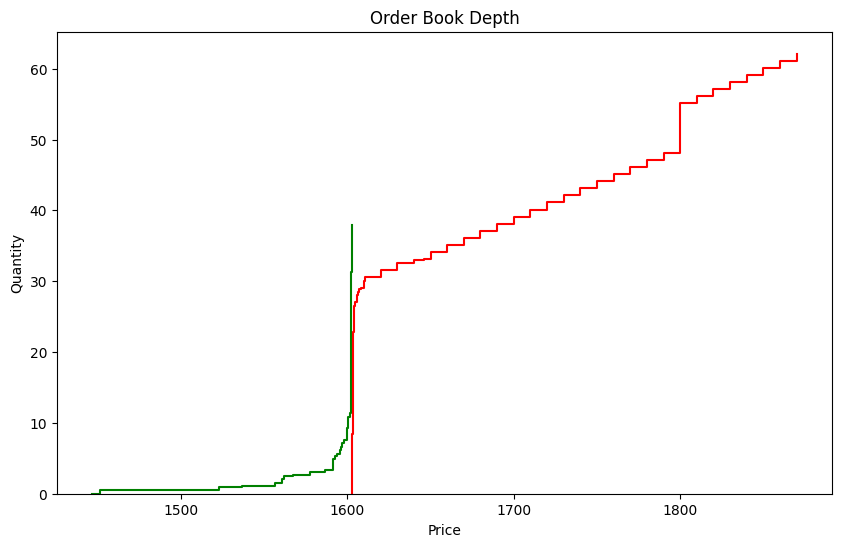

In [501]:
order_book_depth = client.get_order_book(symbol='ETHUSDT')

# Extract bids and asks from the order book depth
bids = order_book_depth['bids']
asks = order_book_depth['asks']

# Get the price and quantity of bids
bid_prices = [float(bid[0]) for bid in bids]
bid_quantities = [float(bid[1]) for bid in bids]

# Get the price and quantity of asks
ask_prices = [float(ask[0]) for ask in asks]
ask_quantities = [float(ask[1]) for ask in asks]


fig, ax = plt.subplots(figsize=(10, 6))

df_bid = pd.DataFrame({'prices': bid_prices, 'quantities': bid_quantities, 'side': 'bid'}).sort_values(by='prices', ascending=True)
df_ask = pd.DataFrame({'prices': ask_prices, 'quantities': ask_quantities, 'side': 'ask'}).sort_values(by='prices', ascending=True)
df_bid_ask = pd.concat([df_bid, df_ask])

sns.ecdfplot(x="prices", weights="quantities", stat="count", data=df_bid_ask[df_bid_ask.side == 'bid'], ax=ax, color='g')
sns.ecdfplot(x="prices", weights="quantities", stat="count", data=df_bid_ask[df_bid_ask.side == 'ask'], ax=ax, color='r')

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.set_title('Order Book Depth')

In [502]:
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(spot_client.ui_klines("BTCUSDT", "4h"), columns=columns)

In [503]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1672804800000,16861.59000000,18035.75000000,8307.14000000,16870.19000000,165.97436700,1672819199999,2798971.39404606,2485,108.96117800,1837619.07780134,0
1,1672819200000,16870.19000000,24403.80000000,16832.66000000,16835.50000000,1179.64754600,1672833599999,19882011.87787909,17239,817.16983100,13772985.77669631,0
2,1672833600000,16835.39000000,27202.29000000,10856.54000000,16853.44000000,1719.75970000,1672847999999,28930279.88620360,30009,1143.40811600,19245945.08747264,0
3,1672848000000,16853.44000000,30000.00000000,15689.25000000,16843.28000000,1803.53789900,1672862399999,30457112.10372194,35896,1218.04454000,20575325.23069635,0
4,1672862400000,16843.07000000,16866.84000000,15737.00000000,16850.67000000,1241.80557900,1672876799999,20898319.93615909,21358,789.84561500,13292056.93568249,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,1674806400000,23073.47000000,23203.03000000,22078.95000000,22965.26000000,1289.57637600,1674820799999,29609946.86825400,27931,839.75687200,19282836.97241893,0
140,1674820800000,22964.83000000,23382.87000000,22672.71000000,22980.65000000,1551.31249900,1674835199999,35628084.55798232,35833,1052.02732900,24162888.21816116,0
141,1674835200000,22987.10000000,23559.59000000,16859.00000000,23252.08000000,1550.60825400,1674849599999,35856356.62053048,38151,1040.09794900,24073708.58622834,0
142,1674849600000,23252.18000000,23559.59000000,5000.00000000,23073.63000000,1488.86200800,1674863999999,34421214.18093878,33555,973.32478900,22515813.36955685,0


In [504]:
print(df['Open Time'])

0      1672804800000
1      1672819200000
2      1672833600000
3      1672848000000
4      1672862400000
           ...      
139    1674806400000
140    1674820800000
141    1674835200000
142    1674849600000
143    1674864000000
Name: Open Time, Length: 144, dtype: int64


In [505]:
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric)

<AxesSubplot: xlabel='Open Time'>

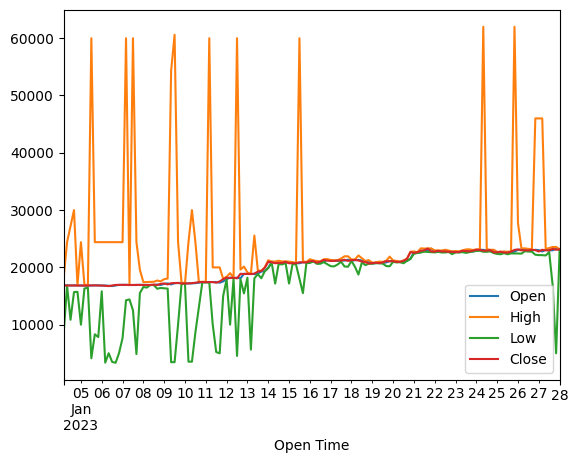

In [506]:
df.plot(x='Open Time', y=['Open', 'High', 'Low', 'Close'], kind='line')

In [507]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Open Time'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()



<AxesSubplot: ylabel='Frequency'>

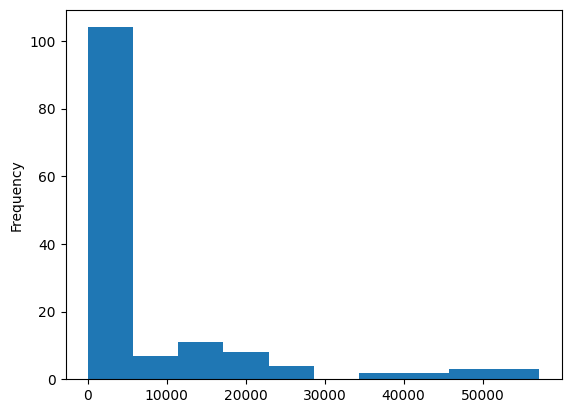

In [508]:
# some of these candles have unusually large wicks - i want to remove them
# first, i want to see the distribution of wick sizes
df['Wick'] = df['High'] - df['Low']
df['Wick'].plot(kind='hist')


In [509]:
fig = go.Figure(data=[go.Candlestick(x=df['Open Time'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
# i want to change the axis so it displays from 0 to the highest value of df['High] + 100 on the y axis

fig.update_layout(yaxis_range=[df['Low'].min() - 2000, df['High'].max() + 2000])
fig.show()


In [510]:
import yfinance as yf

# Define the ticker symbol for Bitcoin
btc = yf.Ticker("BTC-USD")

# Get the historical price data for Bitcoin
btc_data = btc.history(period="1d", start="2019-01-01", end="2023-01-01")
btc_data = btc_data.reset_index()
# Print the first five rows of the data
print(btc_data.head())



                       Date         Open         High          Low  \
0 2019-01-01 00:00:00+00:00  3746.713379  3850.913818  3707.231201   
1 2019-01-02 00:00:00+00:00  3849.216309  3947.981201  3817.409424   
2 2019-01-03 00:00:00+00:00  3931.048584  3935.685059  3826.222900   
3 2019-01-04 00:00:00+00:00  3832.040039  3865.934570  3783.853760   
4 2019-01-05 00:00:00+00:00  3851.973877  3904.903076  3836.900146   

         Close      Volume  Dividends  Stock Splits  
0  3843.520020  4324200990        0.0           0.0  
1  3943.409424  5244856836        0.0           0.0  
2  3836.741211  4530215219        0.0           0.0  
3  3857.717529  4847965467        0.0           0.0  
4  3845.194580  5137609824        0.0           0.0  


In [511]:
fig = go.Figure(data=[go.Candlestick(x=btc_data['Date'],
                open=btc_data['Open'],
                high=btc_data['High'],
                low=btc_data['Low'],
                close=btc_data['Close'], name = 'candle')])


# Calculate the 7, 50 and 200 day moving averages
btc_data['7d'] = btc_data['Close'].rolling(window=7).mean()
btc_data['30d'] = btc_data['Close'].rolling(window=30).mean()
btc_data['50d'] = btc_data['Close'].rolling(window=50).mean()
btc_data['200d'] = btc_data['Close'].rolling(window=200).mean()

# Identify where the 50d and 200d moving averages cross
btc_data['sign'] = np.sign(btc_data['50d'] - btc_data['200d']).diff()
cross_points = btc_data.loc[btc_data['sign'] != 0]

# Plot the data
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['7d'], name='7d'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['30d'], name='30d'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['50d'], name='50d'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['200d'], name='200d'))


# Add markers where the 50 day moving average and 200 day moving average cross
fig.add_trace(go.Scatter(x=cross_points.Date,
                      y=btc_data.loc[cross_points.index, '50d'],
                      mode='markers',
                      name='Death Cross',
                      marker=dict(size=8, color="blue", symbol = 'x')))

fig.update_layout(title='Bitcoin Price History', yaxis_title='Price (USD)')

fig.show() 

In [512]:
#now lets implement a basic MA crossover strategy

# Create a new column for the strategy positions (1 for long, -1 for short)
btc_data = btc_data.copy()

btc_data['position'] = None

# Iterate through the data and update the position column based on the strategy
for i in range(1, len(btc_data)):
    if btc_data.loc[i, '30d'] > btc_data.loc[i, '50d'] and btc_data.loc[i-1, 'position'] != 1:
        btc_data.loc[i, 'position'] = 1 # what if we change this position to 5
    elif btc_data.loc[i, '30d'] < btc_data.loc[i, '50d'] and btc_data.loc[i-1, 'position'] != -1:
        btc_data.loc[i, 'position'] = -1
    else:
        btc_data.loc[i, 'position'] = btc_data.loc[i-1, 'position']

In [513]:
btc_data['returns'] = btc_data['Close'].pct_change()

In [525]:

# Calculate cumulative returns for buy and hold strategy
btc_data['buy_hold_returns'] = (1 + btc_data['returns']).cumprod() - 1

# Calculate cumulative returns for MA crossover strategy
btc_data['strategy_returns'] = btc_data['returns'] * btc_data['position']
btc_data['strategy_cumulative_returns'] = (1 + btc_data['strategy_returns']).cumprod() - 1


# Plot the cumulative returns for the buy and hold strategy and the MA crossover strategy
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_data.Date, y=btc_data['buy_hold_returns'], name='Buy and Hold'))
fig.add_trace(go.Scatter(x=btc_data.Date, y=btc_data['strategy_cumulative_returns'], name='MA Crossover'))
fig.update_layout(title='Cumulative Returns', yaxis_title='Returns')
fig.show()

0.3480741620998029


In [515]:
# Calculate the Sharpe ratio for the buy and hold strategy
buy_hold_sharpe = (btc_data['returns'].mean() - 0.0001) / btc_data['returns'].std()

# Calculate the Sharpe ratio for the MA crossover strategy
strategy_sharpe = (btc_data['strategy_returns'].mean() - 0.0001) / btc_data['strategy_returns'].std()

# Print the Sharpe ratios
print('Buy and Hold Sharpe Ratio: ', buy_hold_sharpe)
print('MA Crossover Sharpe Ratio: ', strategy_sharpe)

Buy and Hold Sharpe Ratio:  0.04312780902307058
MA Crossover Sharpe Ratio:  0.050007476587920534


In [516]:
# Calculate the maximum drawdown for the buy and hold strategy
buy_hold_max_drawdown = (btc_data['buy_hold_returns'].cummax() - btc_data['buy_hold_returns']).max()

# Calculate the maximum drawdown for the MA crossover strategy
strategy_max_drawdown = (btc_data['strategy_cumulative_returns'].cummax() - btc_data['strategy_cumulative_returns']).max()

# Print the maximum drawdowns
print('Buy and Hold Maximum Drawdown: ', buy_hold_max_drawdown)
print('MA Crossover Maximum Drawdown: ', strategy_max_drawdown)

Buy and Hold Maximum Drawdown:  13.471906919227477
MA Crossover Maximum Drawdown:  7.935882852324339


In [529]:
import numpy as np 

buy_hold_annualized_returns = ((btc_data['buy_hold_returns'].iloc[-1]** (365 / len(btc_data))) - 1) * 100
strategy_annualized_returns = (btc_data['strategy_cumulative_returns'].iloc[-1] ** (365 / len(btc_data))) * 100


# Print the annualized returns
print('Buy and Hold Annualized Returns: ', buy_hold_annualized_returns, '%')
print('MA Crossover Annualized Returns: ', strategy_annualized_returns, '%')

# Calculate the annualized volatility for the buy and hold strategy
buy_hold_annualized_volatility = btc_data['returns'].std() * np.sqrt(252)

# Calculate the annualized volatility for the MA crossover strategy
strategy_annualized_volatility = btc_data['strategy_returns'].std() * np.sqrt(252)

# Print the annualized volatility
print('Buy and Hold Annualized Volatility: ', buy_hold_annualized_volatility)
print('MA Crossover Annualized Volatility: ', strategy_annualized_volatility)

Buy and Hold Annualized Returns:  34.80741620998029 %
MA Crossover Annualized Returns:  150.43090230482198 %
Buy and Hold Annualized Volatility:  0.5931268718004946
MA Crossover Annualized Volatility:  0.5983495127271318
